**N-Body Simulation**


make a simple n-body simulation

In [ ]:
#import library yang akan digunakan
#tambahkan komentar agar kamu di masa depan akan berterimakasih

import math
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Kita akan mendefiniskan metode integrasi yang akan digunakan dalam simulasi n-benda



1.   Leapfrog
2.   Euler

kalian juga dapat menggunakan metode runge-kutta (lihat lagi dalam praktikum metode numerik modul persamaan differensial)



In [ ]:
#define euler method
######## EULER #########
def integrator_euler_part1(n_particles, x, v, timestep):
    for i in range(n_particles):
        x[i][0]  += timestep * v[i][0]
        x[i][1]  += timestep * v[i][1]
        x[i][2]  += timestep * v[i][2]

def integrator_euler_part2(n_particles, v, a, timestep):
    for i in range(n_particles):
        v[i][0] += timestep * a[i][0]
        v[i][1] += timestep * a[i][1]
        v[i][2] += timestep * a[i][2]


#define leapfrog method
######## LEAPFROG #########
def integrator_leapfrog_part1(n_particles, x, v, half_timestep):
    for i in range(n_particles):
        x[i][0] += half_timestep * v[i][0]
        x[i][1] += half_timestep * v[i][1]
        x[i][2] += half_timestep * v[i][2]

def integrator_leapfrog_part2(n_particles, x, v, a, timestep, half_timestep):
    for i in range(n_particles):
        v[i][0] += timestep * a[i][0]
        v[i][1] += timestep * a[i][1]
        v[i][2] += timestep * a[i][2]
        x[i][0]  += half_timestep * v[i][0]
        x[i][1]  += half_timestep * v[i][1]
        x[i][2]  += half_timestep * v[i][2]


#definisikan perhitungan gravitasi
######### Calculate Gravity, direct method ########
def gravity_calculate_acceleration(n_particles, m, x, a, G):
    for i in range(n_particles):
        a[i][0] = 0.0 # reset
        a[i][1] = 0.0
        a[i][2] = 0.0
        for j in range(n_particles):
            if (j == i):
                continue
            else:
                dx = x[i][0] - x[j][0]
                dy = x[i][1] - x[j][1]
                dz = x[i][2] - x[j][2]
                r = math.sqrt(dx*dx + dy*dy + dz*dz)
                prefact = -G*m[j]/(r*r*r)
                a[i][0] += prefact * dx # sum for all j
                a[i][1] += prefact * dy
                a[i][2] += prefact * dz

# main
def integrate(m, x0, v0, tmax, dt, G=1.0):
    npar = len(m) # number of particles
    x = x0
    v = v0
    # "create" an empty list with size npar x 3 (ax,ay,az)
    a = [ [0.0 for _ in range(3) ] for _ in range(npar)]

    tstep = dt
    half_tstep = 0.5*tstep
    t = 0.0
    xsave = []

    # main iteration
    ## backward halfstep for leapfrog
    # gravity_calculate_acceleration(npar, m, x, a, G)
    # for i in range(npar):
    #     v[i][0] -= half_tstep * a[i][0]
    #     v[i][1] -= half_tstep * a[i][1]
    #     v[i][2] -= half_tstep * a[i][2]

    while (t < tmax):
        #integrator_leapfrog_part1(npar, x, v, half_tstep)
        integrator_euler_part1(npar, x, v, tstep)
        gravity_calculate_acceleration(npar, m, x, a, G)
        #integrator_leapfrog_part2(npar, x, v, a, tstep, half_tstep)
        integrator_euler_part2(npar, v, a, tstep)
        t += tstep

        # save position
        # if we append list directly, the value is mutable...
        # same value for all
        xsave.append([])
        for particle in x:
            xsave[-1].append([])
            for xyz in particle:
                xsave[-1][-1].append(xyz)

    return xsave

#definisikan plotting simulasi n-benda
def plot_xy(pos):
    '''function to plot xy-coord'''

    npar = len(pos[0])
    pos = np.array(pos) # python-list to numpy-array
    # for easy slicing

    fig = plt.figure(figsize=(5,5))
    ax = plt.subplot(111)
    for i in range(npar):
        # plot each object with different color
        plt.plot(pos[:, i, 0], pos[:, i, 1], ',')

    plt.axis('scaled') # make it using same scale for x and y
    plt.xlabel("x"); plt.ylabel("y")
    plt.show()

Test for two-body problem
there is analytical solution for this problem.

initial condition:

*   m1=0.6; m2=0.4
*   x1=(−0.4,0,0); x2=(0.6,0,0)
*   v1=(0,−0.2,0); v2=(0,0.3,0)
*   G = 1

dt = 0.01, tmax = 100

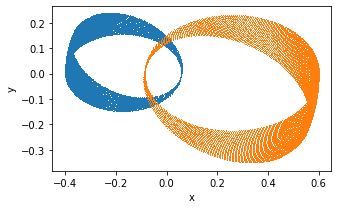

In [ ]:
m = [0.6, 0.4]
x0 = [[-0.4, 0.0, 0.0], [0.6, 0.0, 0.0]]
v0 = [[0., -0.2, 0.], [0., 0.3, 0.]]

xs = integrate(m, x0, v0, 100, 0.01)
plot_xy(xs)

dt = 0.001, tmax = 100

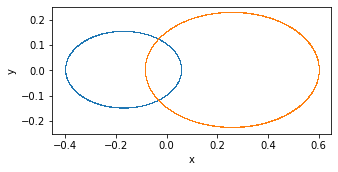

In [ ]:
m = [0.6, 0.4]
x0 = [[-0.4, 0.0, 0.0], [0.6, 0.0, 0.0]]
v0 = [[0., -0.2, 0.], [0., 0.3, 0.]]

xs = integrate(m, x0, v0, 100, 0.001)
plot_xy(xs)

Test for three-body problem
initial condition:


*   m1=3, m2=4, and m3=5
*   r1 = (1.0,3.0,0.0)
*   r2 = (−2.0,−1.0,0.0)
*   r3 = (1.0,−1.0,0.0)
*   v123 = (0,0,0)

use G = 1.0

dt = 0.001, tmax = 5.0

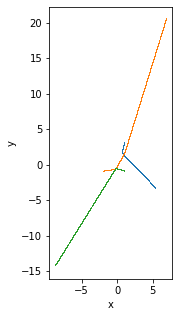

In [ ]:
m = [3.0, 4.0, 5.0]
x0 = [[1.0, 3.0, 0.0], [-2.0, -1.0, 0.0], [1.0, -1.0, 0.0]]
v0 = [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]

xs = integrate(m, x0, v0, 5.0, 0.001)
plot_xy(xs)

dt = 0.0001, tmax = 5.0

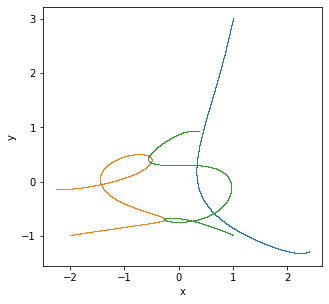

In [ ]:
m = [3.0, 4.0, 5.0]
x0 = [[1.0, 3.0, 0.0], [-2.0, -1.0, 0.0], [1.0, -1.0, 0.0]]
v0 = [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]

xs = integrate(m, x0, v0, 5.0, 0.0001)
plot_xy(xs)